## Practice Questions

This notebook contains practise questions for the assess coursework on the 19th of March. I will upload some model answers in a later lecture. If you can answer all of these questions, then you shouldn't have too much trouble in the coursework.

Please use the ‘litho_log’ data available in the data folder of this repository to complete these exercises.

### Exercise 1 (Approx. 15 mins)

You have been given some data that contains a large number of observations of downhole logs and the name of the lithologies associated with the log response.
 - 'DEPTH_WMSF': the depth of the measurement below seafloor 
 - 'HCGR': Total gamma ray counts 
 - 'HFK': Potassium counts 
 - 'HTHO': Thorium counts 
 - 'HURA': Uranium counts 
 - 'IDPH': Deep Phasor Dual Induction–Spherically Focused Resistivity 
 - 'IMPH': Medium Phasor Dual Induction–Spherically Focused Resistivity 
 - 'SFLU': Shallow Phasor Dual Induction–Spherically Focused Resistivity 
 - 'lithology': our target value, a string representing the name of the lithology
 
Using a Markdown cell, describe the steps that you would take to clean this data and prepare it for machine learning analysis.

### Write your answer here (in this Markdown cell)

Your answer here.

### Exercise 2 (25 minutes)

Load the data set and drop any duplicates you find.

Then answer the following questions:

 - What is the distribution of the lithologies in this dataset?
 - What is the average depth of the interbedded clay and mud?
 - Among the samples found at or below 400m (below seafloor), what are the characteristics of the samples with the five highest Uranium counts?

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Data/litho_log_data.csv')
data.drop_duplicates(inplace = True)

duplicates = data.duplicated()

print("The sum of duplicates in the dataset are", duplicates.sum())


data.describe()



The sum of duplicates in the dataset are 0


,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU
count,12679.000000,12670.000000,12672.000000,12670.000000,12676.000000,12676.000000,12669.000000,12675.000000
mean,240.188858,40.273614,1.093900,6.507539,1.525871,298.732181,336.555715,501.254062
std,167.801979,20.481547,0.613088,3.121844,0.815444,697.334446,714.193282,2145.676964
min,0.072400,0.029500,-0.070000,-0.136600,-0.510500,0.339900,0.285100,0.091500
25%,104.474800,23.601925,0.593450,4.002075,0.893850,1.197275,1.102000,0.632100
50%,212.976400,43.776500,1.144300,7.122450,1.533650,1.337950,1.245200,0.750500
75%,342.892400,55.553225,1.558500,8.796875,2.061750,2.067400,2.067400,1.068650
max,821.981200,93.633400,2.793700,16.031500,5.351800,1950.000000,1950.000000,9700.000000


[ 979.    0. 1863.    0. 1812.    0. 5406.    0. 2619.]


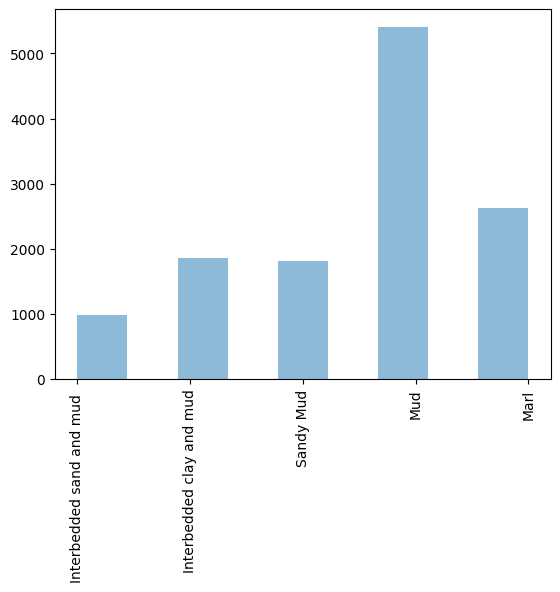

In [47]:
hist = plt.hist(data['lithology'], bins = 9,  alpha=0.5);

plt.xticks(rotation=90)

print(hist[0])

In [48]:
data

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,lithology
0,0.0880,1.9945,0.0354,0.4317,0.0501,1950.0000,1950.0000,0.1589,Interbedded sand and mud
1,0.2404,3.4090,0.0708,0.6778,0.0352,1950.0000,1950.0000,0.1589,Interbedded sand and mud
2,0.3928,5.6734,0.1203,1.1137,0.1518,1950.0000,1950.0000,0.1589,Interbedded sand and mud
3,0.5452,9.4665,0.2242,1.7213,0.0793,1950.0000,1950.0000,0.1589,Interbedded clay and mud
4,0.6976,9.9356,0.2286,1.8462,0.4811,1950.0000,1950.0000,0.1589,Interbedded clay and mud
...,...,...,...,...,...,...,...,...,...
13003,21.1192,8.1052,0.2050,1.3974,0.2821,1950.0000,1950.0000,0.1589,Interbedded sand and mud
13004,11.3656,14.3280,0.2526,3.1132,0.0648,1950.0000,1950.0000,0.1589,Interbedded sand and mud
13006,668.6668,47.3333,1.4844,6.4872,1.6403,1.4437,1.2036,0.6174,Sandy Mud
13010,450.1252,41.8986,1.2812,5.9343,2.3948,1.1804,1.0665,0.5415,Marl


In [65]:
filtered_data = data[data['lithology'] == "Interbedded clay and mud"]

filtered_data

mean = data['DEPTH_WMSF'].mean()

print("the mean is", mean.round(3), "metres depth")


the mean is 240.189 metres depth


In [80]:
filtered_by_depth = data[(data['DEPTH_WMSF'] >=400)]

sorted_data = filtered_by_depth.sort_values(by='HURA', ascending=False)

sorted_data.head()

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,lithology
2656,432.9040,36.3385,1.1301,5.0357,5.3518,1.2467,1.1140,0.6402,Marl
2657,433.0564,40.7457,1.2416,5.7963,5.1878,1.2465,1.1150,0.6592,Marl
2659,433.3612,41.2251,1.2359,5.9830,5.0735,1.2500,1.1159,0.6541,Marl
2655,432.7516,34.8786,1.0104,5.2683,4.9194,1.2480,1.1136,0.6050,Marl
3821,783.8812,42.5650,1.0508,7.4969,4.9164,1.6550,1.4932,0.9354,Sandy Mud


### Exercise 3.1 (10 minutes)

Using the steps you outlined in Exercise 1, split this dataset into a training set and a testing set (with reasonable names). 

In [81]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, train_size=0.7, random_state = 30)



### Exercise 3.2 (20 minutes)

Examine the training set. Are there any missing or unusual values in any of the columns? What are these values and in which columns can they be found? Use a Markdown cell to describe your findings.

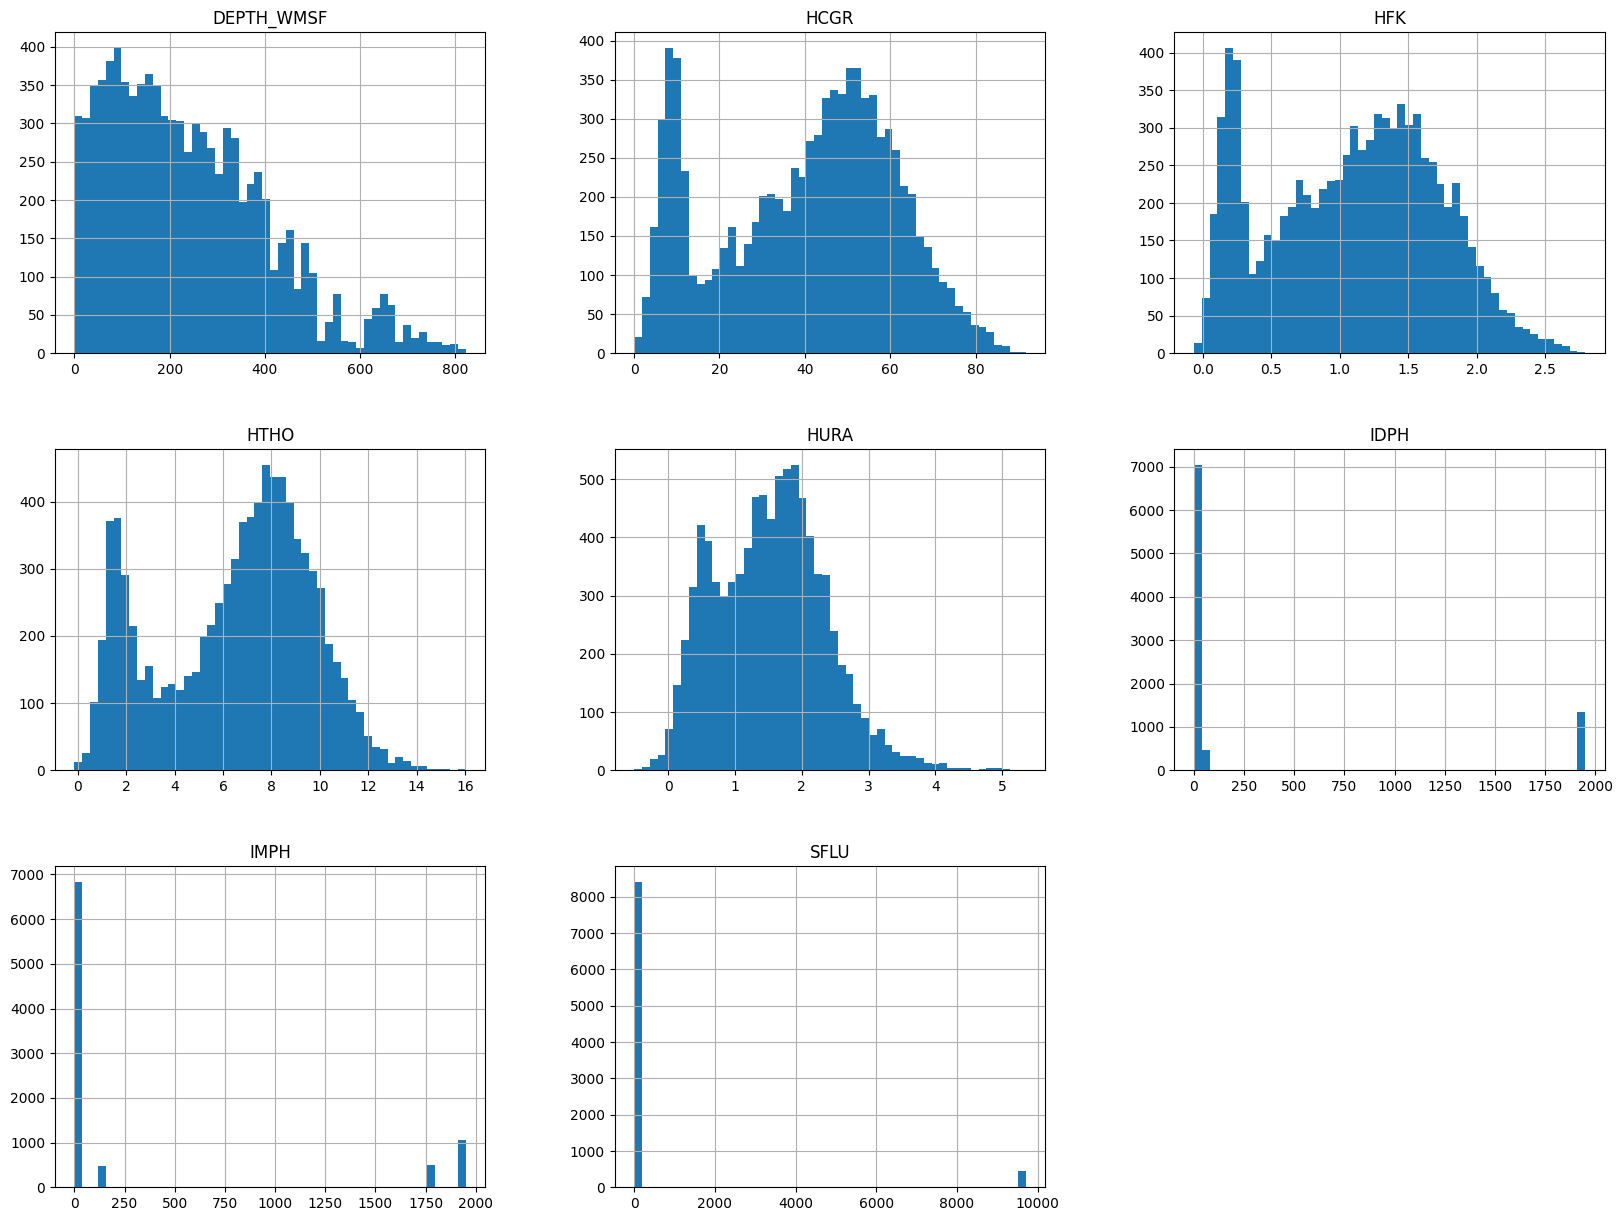

In [83]:
train_set.hist(bins=50, figsize=(20,15));

## Exercise 3.3 (10 minutes)

Replace any unusual values with `np.nan`. 

In [89]:
#uranium, thorium and potassium counts of less than zero don't make sense so I remove them here:
train_set["HURA"] = train_set["HURA"].apply(lambda x: np.where(x < 0, np.nan, x))
train_set["HTHO"] = train_set["HTHO"].apply(lambda x: np.where(x < 0, np.nan, x))
train_set["HFK"] = train_set["HFK"].apply(lambda x: np.where(x < 0, np.nan, x))

#incredibly high resistivity values are outliers, most likely unsuccessful or erroneous readings, so I remove them here:
train_set["IDPH"] = train_set["IDPH"].apply(lambda x: np.where(x > 1500, np.nan, x))
train_set["IMPH"] = train_set["IMPH"].apply(lambda x: np.where(x > 1500, np.nan, x))
train_set["SFLU"] = train_set["SFLU"].apply(lambda x: np.where(x > 1500, np.nan, x))


nones = train_set.isna()
nones.sum()


DEPTH_WMSF       0
HCGR             2
HFK             22
HTHO            17
HURA            76
IDPH          1347
IMPH          1558
SFLU           463
lithology        0
dtype: int64

## Exercise 4 (30 mins)

Create a pipeline with an `Imputer`, a `Scaler`, and a `DecisionTreeClassifier`. Set the `random_state` of the `DecisionTreeClassifier` to 42.

Create and run a RandomizedSearchCV on three hyperparameters of your choice using `accuracy` as the metric of choice (use `n_iter = 20`). Explain what varying each of your selected hyperparameters will do to your model.

Print out the accuracy and parameters of your best model.

## Exercise 5 (10 mins)

Explain why accuracy may not be the best metric for assessing the performance of a classifier model.

Describe three other classification metrics and the scenarios in which they would be useful.